# Breaking Tunes Analysis

In [1]:
import pandas as pd #dataframe tools
import numpy as np #linear algebra

In [49]:
#visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
#support libraries
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import string

### Inital analysis and data cleaning

In [51]:
df = pd.read_csv('breakingtunes.csv') #read in dataset scraped from www.breakingtunes.com

In [52]:
df.head()

,band_name,itunes,bandcamp,town/city,twitter,influences,sounds_like,genre,bio,official_site,facebook,county,myspace,location
0,Dirk Quinn Band,True,True,Philadelphia PA USA,True,Led Zeppelin\r\nPink Floyd,"Martin,Medeski,and Wood\r\nSoulive\r\nLettuce\...",Other,Dirk Quinn ...is the guitarist for a high ener...,True,True,Limerick,True,"Philadelphia, PA, USA, County Limerick"
1,Runaway John,True,True,Dublin 7,True,"Bob Dylan,Damien rice,Ed Sheeran,Glen Hansard,...","Damien rice,Jason Mraz,Passenger,Ryan Adams",Folk,Runaway John is a Romanian-born singer-songwri...,True,True,Dublin,False,"Dublin 7, County Dublin"
2,Two For Joy,False,True,NaN,False,"Beatles,Bob Dylan,Don McClean,Fleetwood Mac,Ja...",NaN,Alternative,"We are Two For Joy, an original band with plen...",False,True,Dublin,False,County Dublin
3,Jim McHugh,True,False,Castleblayney,True,NaN,NaN,Alternative,"A native of Castleblayney Co Monaghan Ireland,...",True,True,Monaghan,False,"Castleblayney, County Monaghan"
4,Nimbu§,False,False,NaN,False,"DBC Pierre,Daughter,Keaton Henson,Phoria,Sufja...",NaN,Alternative,"Nimbu§ is an alternative, collaborative music ...",True,False,Waterford,False,County Waterford


In [53]:
def clean_words(mess):
    item_list = mess.split(',')#split on ',' into word list
    item_list = [word.replace('\n', ' ') for word in item_list]#remove newline char
    item_list = [word.replace('\r', ' ') for word in item_list]#remove return carriage char
    return item_list

In [54]:
df['influences'].fillna('Not Stated', inplace=True)
df['sounds_like'].fillna('Not Stated', inplace=True)#fill null values
df['influences'] = df['influences'].apply(clean_words)
df['sounds_like'] = df['sounds_like'].apply(clean_words)#apply clean_words function

### Generate Statistics

In [55]:
def top_bands(input_df, field, county='all', limit=10):
    #function to return an ordered table of the highest counts in a given category
    if county != 'all': #if a county is input
        input_df = input_df[input_df['county'] == county]
    artist_lst = []
    for index, artists in input_df[field].iteritems():
        for artist in artists:
            artist_lst.append(artist)#create single list of all bands
    artist_counter = {}
    for artist in artist_lst:
        if artist.lower() not in artist_counter:
            artist_counter[artist.lower()] = 1
        else:
            artist_counter[artist.lower()] += 1 #count how many times each band is mentioned
    artist_counter.pop('not stated', None)#remove this item
    count_df = pd.DataFrame(list(artist_counter.items()), columns = ['artist', 'count'])
    count_df.sort_values(by='count', ascending=False, inplace=True)
    count_df.reset_index(drop=True, inplace=True)#create dataframe sorted by values
    count_df.index+=1
    print('Top ' + str(limit) + ' ' + field + ' in ' + county)
    return count_df.head(limit)#output n amount of results

In [56]:
top_bands(df, 'influences', limit=20) #List of top band influences for the country

Top 20 influences in all


,artist,count
1,radiohead,381
2,the beatles,363
3,bob dylan,338
4,neil young,264
5,nirvana,256
6,tom waits,227
7,pink floyd,178
8,led zeppelin,177
9,u2,177
10,foo fighters,173


In [57]:
top_bands(df, 'influences', limit=10, county='Dublin')

Top 10 influences in Dublin


,artist,count
1,radiohead,183
2,the beatles,172
3,bob dylan,157
4,neil young,116
5,nirvana,106
6,tom waits,95
7,david bowie,92
8,u2,89
9,led zeppelin,81
10,oasis,80


In [58]:
top_bands(df, 'influences', limit=10, county='Cork')

Top 10 influences in Cork


,artist,count
1,the beatles,35
2,radiohead,33
3,pink floyd,23
4,nirvana,23
5,neil young,22
6,rory gallagher,21
7,bob dylan,20
8,led zeppelin,19
9,jeff buckley,18
10,tom waits,17


In [59]:
top_bands(df, 'sounds_like', limit=20) #List of who bands state they sound most like

Top 20 sounds_like in all


,artist,count
1,radiohead,164
2,nirvana,111
3,bob dylan,109
4,neil young,104
5,the beatles,100
6,foo fighters,95
7,queens of the stone age,91
8,tom waits,89
9,u2,89
10,kings of leon,88


In [60]:
def value_count(input_df, to_count):
    #function to return an ordered table of the highest counts per genre or county
    counter = {}
    for index, value in input_df[to_count].iteritems():
        if value not in counter:
            counter[value] = 1
        else:
            counter[value]+=1
    output_df = pd.DataFrame(list(counter.items()), columns = [str(to_count), 'count'])
    output_df.sort_values(by='count', ascending=False, inplace=True)
    output_df.reset_index(drop=True, inplace=True)
    output_df.index+=1
    return output_df

In [61]:
genre_count = value_count(df, 'genre')

In [62]:
genre_count#the most popular music genres in the country

,genre,count
1,Alternative,936
2,Rock,831
3,Indie,422
4,Folk,391
5,Other,369
6,Acoustic,353
7,Pop,344
8,Electronica,271
9,Experimental,121
10,Hip Hop,97


In [63]:
county_count = value_count(df, 'county')

In [64]:
county_count#the counties with the most bands

,county,count
1,Dublin,2094
2,Cork,453
3,Galway,244
4,Antrim,230
5,Kildare,158
6,Limerick,128
7,Wicklow,109
8,Wexford,90
9,Donegal,89
10,Meath,82


In [65]:
def genre_per_county(county):
    #function to return a table of the highest counts of genre per county
    return value_count(df[df['county'] == county], 'genre')

In [66]:
genre_per_county('Galway')

,genre,count
1,Rock,48
2,Alternative,41
3,Folk,34
4,Acoustic,21
5,Indie,18
6,Other,18
7,Pop,17
8,Electronica,13
9,Experimental,7
10,Hip Hop,7


In [67]:
platforms = ['facebook', 'twitter', 'official_site', 'itunes', 'bandcamp', 'myspace']

In [68]:
def percentage_on_platform(platform):
    #funtion to return the percentage of bands on a given social media platform
    platform_df = pd.DataFrame(df.groupby(platform, as_index=False).size())
    platform_df.reset_index(drop=True, inplace=True)
    return format(platform_df[0][1] / (platform_df[0][0] + platform_df[0][1]) * 100, '.2f')

On facebook


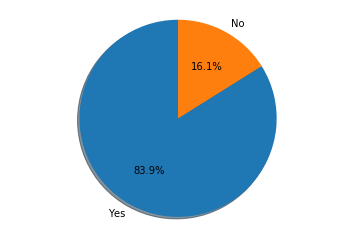

On twitter


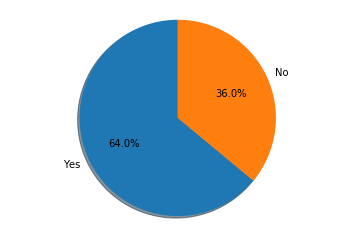

On official_site


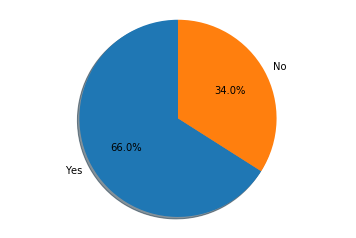

On itunes


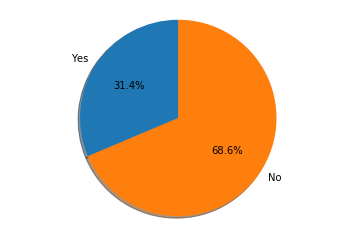

On bandcamp


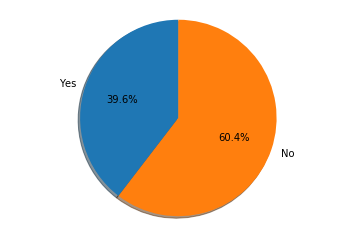

On myspace


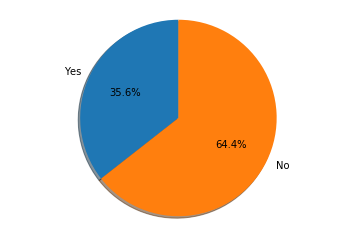

In [69]:
for platform in platforms:
    #output a pie chart to display the percentage figures for each platform
    print('On ' + platform)
    yes = float(percentage_on_platform(platform))
    no = 100-yes
    labels = 'Yes', 'No'
    sizes = [yes, no]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Wordcloud

In [70]:
#combine all band bios into a single string
band_bios = ''
for index, content in df['bio'].iteritems():
    band_bios += content

In [71]:
len(band_bios)

5586012

(-0.5, 621.5, 799.5, -0.5)

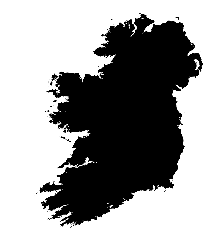

In [72]:
ireland_image = Image.open('ireland_mask.png')
plt.imshow(ireland_image)
plt.axis('off')

In [73]:
#using the image of ireland, create an array of numbers corresponding to each pixel
#this array will be used as a mask for the wordcloud
ireland_mask = np.invert(np.array(ireland_image))
ireland_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

(-0.5, 621.5, 799.5, -0.5)

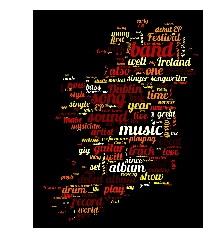

In [74]:
wc = WordCloud(stopwords=STOPWORDS,
               background_color = 'black',
               font_path = 'Lobster_1.3.otf',
              mask = ireland_mask,
              colormap = 'hot',
              max_font_size = 80)
wc.generate(band_bios)
plt.imshow(wc)
plt.axis('off')

In [292]:
wc.to_file('ireland_wordcloud.png')